#MXNet (From Scratch)

In [0]:
import mxnet as mx
from mxnet import nd
import matplotlib.pyplot as plt

ctx = mx.gpu()

##Getting the data

In [0]:
mnist = mx.gluon.data.vision.MNIST()

(28, 28)


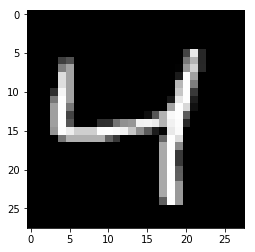

In [3]:
image, _ = mnist[2]

image = image.flatten().astype('float32').as_in_context(ctx)

print(image.shape)

plt.imshow(image.asnumpy(), cmap = 'gray')
plt.show()

##Understanding how to pad tensors


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<NDArray 5x5 @cpu(0)>


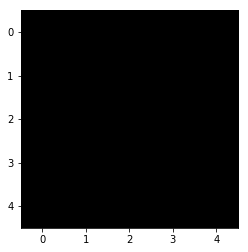


[[0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]]
<NDArray 5x7 @cpu(0)>


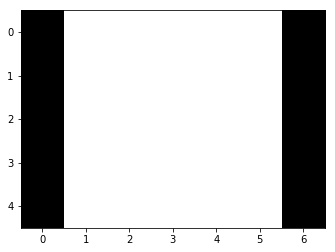


[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
<NDArray 7x7 @cpu(0)>


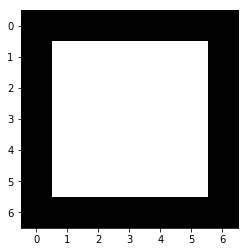

In [4]:
x = nd.ones((5, 5))
print(x)
plt.imshow(x.asnumpy(), cmap = 'gray')
plt.show()

ht, hb, vl, vr, = nd.zeros((1, 7)), nd.zeros((1, 7)), nd.zeros((5, 1)), nd.zeros((5, 1))
# (1, 7) because after adding 2 columns at left and right we are gonna have total 5 + 1 + 1 columns 

y = nd.concat(vl, x, vr, dim = 1)
print(y)
plt.imshow(y.asnumpy(), cmap = 'gray')
plt.show()

y = nd.concat(ht, y, hb, dim = 0)
print(y)
plt.imshow(y.asnumpy(), cmap = 'gray')
plt.show()

In [0]:
def convolution_with_padding(inputs, kernal, padding = (1, 1)):
    filter_hight, filter_width = kernal.shape
    horizental_pad, vertical_pad = padding
    hight, width = (inputs.shape[0]  + (2 * vertical_pad) - filter_hight) + 1, (inputs.shape[1] + (2 * horizental_pad) - filter_width) + 1
    
    horizental_paddings = nd.zeros((horizental_pad, inputs.shape[1])).as_in_context(ctx)
    vertical_paddings = nd.zeros((inputs.shape[0] + 2 * horizental_pad, vertical_pad)).as_in_context(ctx)
    
    # + (2 * horizental_pad) because we are gonna add of 2 horizontal paddings 
    
    plt.imshow(inputs.asnumpy(), cmap = 'gray')
    plt.title(f'shape: {inputs.shape}')
    plt.show()
    
    inputs = nd.concat(horizental_paddings, inputs, horizental_paddings, dim = 0) # dim = 0 for concat alng rows
    inputs = nd.concat(vertical_paddings, inputs, vertical_paddings, dim = 1) # dim = 0 for concat alng columns
    
    plt.imshow(inputs.asnumpy(), cmap = 'gray')
    plt.title(f'shape: {inputs.shape}')
    plt.show()
    
    layer = nd.zeros((int(hight), int(width)))
    
    row = 0
    for i in range(0, inputs.shape[0]):
        col = 0
        for j in range(0, inputs.shape[1]):
            if (i + filter_hight <= inputs.shape[0]) and (j + filter_width <= inputs.shape[1]):
                layer[row, col] = (inputs[i:i + filter_hight, j:j + filter_width] * kernal).sum()
            col += 1
        row += 1
        
    return layer

##Padding with shape (2, 2)

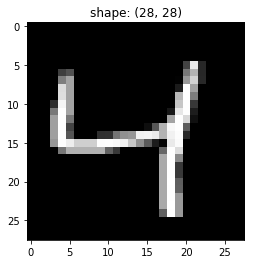

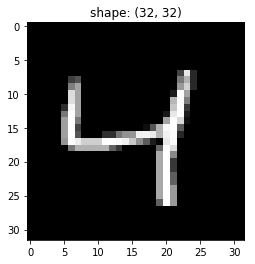

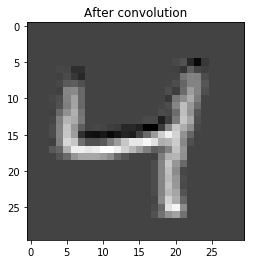

(30, 30)

In [6]:
kernal = nd.random.normal(0, 1, (3, 3)).as_in_context(ctx)

output = convolution_with_padding(image, kernal, padding = (2, 2))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.title('After convolution')
plt.show()

output.shape

##Padding with shape (3, 3)

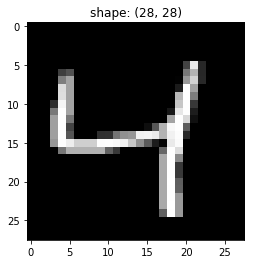

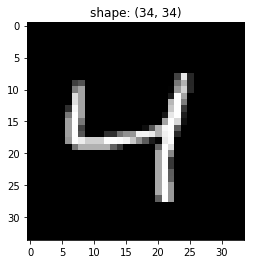

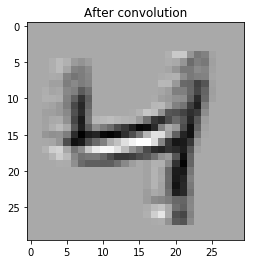

(30, 30)

In [7]:
kernal = nd.random.normal(0, 1, (5, 5)).as_in_context(ctx)

output = convolution_with_padding(image, kernal, padding = (3, 3))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.title('After convolution')
plt.show()

output.shape